<a href="https://colab.research.google.com/github/devdastl/EVA-8_Phase-1_Assignment-6/blob/main/EVA_assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone assignment to setup python files

In [15]:
import os
!git clone https://github.com/devdastl/EVA-8_Phase-1_Assignment-6.git
os.chdir('EVA-8_Phase-1_Assignment-6')

Cloning into 'EVA-8_Phase-1_Assignment-6'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 1), reused 10 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), 11.37 KiB | 3.79 MiB/s, done.


## Install albumentation library!

In [2]:
!python3 -m pip install -U albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 8.1 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


## Import required libraries

In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

#!python3 -m pip install -U torchvision

## Get CIFAR10 data from torchvision

In [5]:
from components.data import Dataset


my_cifar10_train = Dataset('CIFAR10', train=True, batch_size=128)
my_cifar10_test = Dataset('CIFAR10', train=False, batch_size=64)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


## get dataloader attribute from my_cifar10 custom module

In [6]:
train_dataloader = my_cifar10_train.dataloader
test_dataloader = my_cifar10_test.dataloader

## Get dataset attributes

In [7]:
data = [img for img,label in my_cifar10_train]
data = torch.stack(data)

#data = data.view(data.size(0), data.size(1), -1)

print('[Train]')
print(' - Tensor Shape:', data.size())
print(' - min:', torch.min(data))
print(' - max:', torch.max(data))
print(' - mean_channel:', [torch.mean(data[:,0,:,:]), torch.mean(data[:,1,:,:]), torch.mean(data[:,2,:,:])])
print(' - std_channel:', [torch.std(data[:,0,:,:]), torch.std(data[:,1,:,:]), torch.std(data[:,2,:,:])])
print(' - mean:', torch.mean(data))
print(' - std:', torch.std(data))
print(' - var:', torch.var(data))

[Train]
 - Tensor Shape: torch.Size([50000, 3, 32, 32])
 - min: tensor(-2.0032)
 - max: tensor(2.1198)
 - mean_channel: [tensor(-0.0308), tensor(-0.0215), tensor(0.0052)]
 - std_channel: [tensor(0.9404), tensor(0.9480), tensor(0.9277)]
 - mean: tensor(-0.0157)
 - std: tensor(0.9388)
 - var: tensor(0.8814)


## Dataset visualization

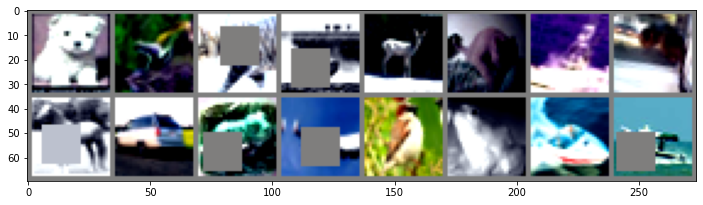

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision 

# functions to show an image
cifar_dataset=train_dataloader
classes= ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, ax = plt.subplots(figsize=(12, 12))

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(cifar_dataset)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images[:16]))

## Model visualization
Here we are using two different models.
my

In [9]:
from components.model import Netv1, Netv2 #, Net_squeeze_expand
#from components.model2 import Net_squeeze_expand
!pip install torchsummary
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

my_model1 = Netv1(in_channel=3, norm_type="batch", drop_out=0.01).to(device)
my_model2 = Netv2(in_channel=3, norm_type="batch", drop_out=0.01).to(device)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda


In [10]:
#print model summary for all 3 models

print("-----------------------------------model arcitecture with 3x3 stride 2 pooling------------------------")
summary(my_model1, input_size=(3,32, 32))

print("-----------------------------------model arcitecture with dilated conv pooling------------------------")
summary(my_model2, input_size=(3,32, 32))

-----------------------------------model arcitecture with 3x3 stride 2 pooling------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 30, 30]           4,608
       BatchNorm2d-6           [-1, 32, 30, 30]              64
              ReLU-7           [-1, 32, 30, 30]               0
           Dropout-8           [-1, 32, 30, 30]               0
            Conv2d-9           [-1, 32, 30, 30]             288
           Conv2d-10           [-1, 32, 30, 30]           1,024
DepthwiseSeparable-11           [-1, 32, 30, 30]               0
      BatchNorm2d-12           [-1, 32, 30, 30]              64

In [11]:
# import our custom classes for training and testing model

from components.training import TrainModel
from components.test import TestModel
from torch.optim.lr_scheduler import StepLR 

EPOCHS = 80

In [12]:
# Training model with batch normalization and L1 regularization
my_model1 = Netv1(in_channel=3, norm_type="batch", drop_out=0.01).to(device)
optimizer1 = optim.SGD(my_model1.parameters(), lr=0.01, momentum=0.9)
scheduler1 = StepLR(optimizer1, step_size=20, gamma=0.1) 

train_module1 = TrainModel(my_model1, device, train_dataloader, optimizer1)
test_module1 = TestModel(my_model1, device, test_dataloader)


my_model2 = Netv2(in_channel=3, norm_type="batch", drop_out=0.01).to(device)
optimizer2 = optim.SGD(my_model2.parameters(), lr=0.01, momentum=0.9)
scheduler2 = StepLR(optimizer2, step_size=20, gamma=0.1) 

train_module2 = TrainModel(my_model2, device, train_dataloader, optimizer2)
test_module2 = TestModel(my_model2, device, test_dataloader)

In [13]:
# Training model with Group normalization

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    
    train_module1.train_a(L1_reg=False, l1_lambda=0.0001) # batch norm model with L1 regularization.
    test_module1.test()
    scheduler1.step()
    
    train_module2.train_a(L1_reg=False, l1_lambda=0.0001) # batch norm model with L1 regularization.
    test_module2.test()
    scheduler2.step()

EPOCH: 0


Loss=1.5897586345672607 Batch_id=390 Accuracy=33.50: 100%|██████████| 391/391 [00:19<00:00, 20.28it/s]



Test set: Average loss: 1.4460, Accuracy: 4846/10000 (48.46%)



Loss=1.5536292791366577 Batch_id=390 Accuracy=28.27: 100%|██████████| 391/391 [00:22<00:00, 17.09it/s]



Test set: Average loss: 1.5133, Accuracy: 4312/10000 (43.12%)

EPOCH: 1


Loss=1.3457367420196533 Batch_id=390 Accuracy=49.45: 100%|██████████| 391/391 [00:18<00:00, 20.65it/s]



Test set: Average loss: 1.1710, Accuracy: 5835/10000 (58.35%)



Loss=1.4595191478729248 Batch_id=390 Accuracy=42.46: 100%|██████████| 391/391 [00:21<00:00, 18.53it/s]



Test set: Average loss: 1.3640, Accuracy: 5137/10000 (51.37%)

EPOCH: 2


Loss=1.2452489137649536 Batch_id=390 Accuracy=56.59: 100%|██████████| 391/391 [00:18<00:00, 20.96it/s]



Test set: Average loss: 0.9295, Accuracy: 6715/10000 (67.15%)



Loss=1.2049853801727295 Batch_id=390 Accuracy=49.09: 100%|██████████| 391/391 [00:21<00:00, 18.29it/s]



Test set: Average loss: 1.1793, Accuracy: 5748/10000 (57.48%)

EPOCH: 3


Loss=1.079801321029663 Batch_id=390 Accuracy=60.92: 100%|██████████| 391/391 [00:19<00:00, 20.46it/s]



Test set: Average loss: 0.9955, Accuracy: 6640/10000 (66.40%)



Loss=1.2810429334640503 Batch_id=390 Accuracy=53.92: 100%|██████████| 391/391 [00:21<00:00, 18.48it/s]



Test set: Average loss: 1.1178, Accuracy: 6099/10000 (60.99%)

EPOCH: 4


Loss=1.0241787433624268 Batch_id=390 Accuracy=63.93: 100%|██████████| 391/391 [00:18<00:00, 20.73it/s]



Test set: Average loss: 0.8034, Accuracy: 7227/10000 (72.27%)



Loss=0.963010311126709 Batch_id=390 Accuracy=57.23: 100%|██████████| 391/391 [00:20<00:00, 18.68it/s]



Test set: Average loss: 1.1304, Accuracy: 6073/10000 (60.73%)

EPOCH: 5


Loss=0.6936078667640686 Batch_id=390 Accuracy=65.97: 100%|██████████| 391/391 [00:18<00:00, 21.27it/s]



Test set: Average loss: 0.7713, Accuracy: 7352/10000 (73.52%)



Loss=1.1213043928146362 Batch_id=390 Accuracy=59.95: 100%|██████████| 391/391 [00:22<00:00, 17.16it/s]



Test set: Average loss: 0.9210, Accuracy: 6697/10000 (66.97%)

EPOCH: 6


Loss=0.9623137712478638 Batch_id=390 Accuracy=67.24: 100%|██████████| 391/391 [00:18<00:00, 21.00it/s]



Test set: Average loss: 0.6964, Accuracy: 7594/10000 (75.94%)



Loss=1.270289659500122 Batch_id=390 Accuracy=62.01: 100%|██████████| 391/391 [00:21<00:00, 18.58it/s]



Test set: Average loss: 0.8800, Accuracy: 6983/10000 (69.83%)

EPOCH: 7


Loss=0.7101457715034485 Batch_id=390 Accuracy=68.84: 100%|██████████| 391/391 [00:18<00:00, 21.34it/s]



Test set: Average loss: 0.6646, Accuracy: 7692/10000 (76.92%)



Loss=1.0359039306640625 Batch_id=390 Accuracy=63.53: 100%|██████████| 391/391 [00:20<00:00, 18.94it/s]



Test set: Average loss: 0.8825, Accuracy: 6940/10000 (69.40%)

EPOCH: 8


Loss=0.8900694847106934 Batch_id=390 Accuracy=70.01: 100%|██████████| 391/391 [00:18<00:00, 21.42it/s]



Test set: Average loss: 0.6758, Accuracy: 7702/10000 (77.02%)



Loss=0.8854028582572937 Batch_id=390 Accuracy=64.98: 100%|██████████| 391/391 [00:20<00:00, 18.89it/s]



Test set: Average loss: 0.8629, Accuracy: 7061/10000 (70.61%)

EPOCH: 9


Loss=1.1020764112472534 Batch_id=390 Accuracy=70.76: 100%|██████████| 391/391 [00:18<00:00, 21.57it/s]



Test set: Average loss: 0.6653, Accuracy: 7751/10000 (77.51%)



Loss=0.7962124347686768 Batch_id=390 Accuracy=66.29: 100%|██████████| 391/391 [00:20<00:00, 18.79it/s]



Test set: Average loss: 0.8338, Accuracy: 7132/10000 (71.32%)

EPOCH: 10


Loss=0.7494572401046753 Batch_id=390 Accuracy=71.69: 100%|██████████| 391/391 [00:18<00:00, 21.34it/s]



Test set: Average loss: 0.6252, Accuracy: 7854/10000 (78.54%)



Loss=0.9078505635261536 Batch_id=390 Accuracy=67.06: 100%|██████████| 391/391 [00:22<00:00, 17.42it/s]



Test set: Average loss: 0.7588, Accuracy: 7355/10000 (73.55%)

EPOCH: 11


Loss=0.7084083557128906 Batch_id=390 Accuracy=72.62: 100%|██████████| 391/391 [00:18<00:00, 20.93it/s]



Test set: Average loss: 0.6006, Accuracy: 7923/10000 (79.23%)



Loss=0.7138347625732422 Batch_id=390 Accuracy=67.71: 100%|██████████| 391/391 [00:20<00:00, 18.67it/s]



Test set: Average loss: 0.7199, Accuracy: 7555/10000 (75.55%)

EPOCH: 12


Loss=0.6760907173156738 Batch_id=390 Accuracy=73.17: 100%|██████████| 391/391 [00:18<00:00, 21.09it/s]



Test set: Average loss: 0.6158, Accuracy: 7942/10000 (79.42%)



Loss=0.7060312628746033 Batch_id=390 Accuracy=68.79: 100%|██████████| 391/391 [00:20<00:00, 18.71it/s]



Test set: Average loss: 0.7932, Accuracy: 7301/10000 (73.01%)

EPOCH: 13


Loss=0.6669073700904846 Batch_id=390 Accuracy=73.66: 100%|██████████| 391/391 [00:18<00:00, 21.34it/s]



Test set: Average loss: 0.6115, Accuracy: 7898/10000 (78.98%)



Loss=0.9281758069992065 Batch_id=390 Accuracy=69.44: 100%|██████████| 391/391 [00:21<00:00, 18.58it/s]



Test set: Average loss: 0.7352, Accuracy: 7454/10000 (74.54%)

EPOCH: 14


Loss=0.6176833510398865 Batch_id=390 Accuracy=74.51: 100%|██████████| 391/391 [00:18<00:00, 21.05it/s]



Test set: Average loss: 0.6164, Accuracy: 7884/10000 (78.84%)



Loss=0.8812134861946106 Batch_id=390 Accuracy=69.55: 100%|██████████| 391/391 [00:21<00:00, 18.58it/s]



Test set: Average loss: 0.7832, Accuracy: 7355/10000 (73.55%)

EPOCH: 15


Loss=0.662346601486206 Batch_id=390 Accuracy=74.90: 100%|██████████| 391/391 [00:18<00:00, 20.93it/s]



Test set: Average loss: 0.5518, Accuracy: 8108/10000 (81.08%)



Loss=0.7785598635673523 Batch_id=390 Accuracy=70.41: 100%|██████████| 391/391 [00:21<00:00, 18.19it/s]



Test set: Average loss: 0.6763, Accuracy: 7664/10000 (76.64%)

EPOCH: 16


Loss=0.5863109230995178 Batch_id=390 Accuracy=75.05: 100%|██████████| 391/391 [00:18<00:00, 20.77it/s]



Test set: Average loss: 0.6600, Accuracy: 7765/10000 (77.65%)



Loss=0.836931049823761 Batch_id=390 Accuracy=70.86: 100%|██████████| 391/391 [00:21<00:00, 18.52it/s]



Test set: Average loss: 0.7009, Accuracy: 7610/10000 (76.10%)

EPOCH: 17


Loss=0.7417283058166504 Batch_id=390 Accuracy=75.71: 100%|██████████| 391/391 [00:18<00:00, 20.99it/s]



Test set: Average loss: 0.5765, Accuracy: 8066/10000 (80.66%)



Loss=0.7782107591629028 Batch_id=390 Accuracy=71.30: 100%|██████████| 391/391 [00:21<00:00, 18.42it/s]



Test set: Average loss: 0.6508, Accuracy: 7773/10000 (77.73%)

EPOCH: 18


Loss=0.7725726366043091 Batch_id=390 Accuracy=75.96: 100%|██████████| 391/391 [00:18<00:00, 20.71it/s]



Test set: Average loss: 0.5563, Accuracy: 8123/10000 (81.23%)



Loss=0.7899360656738281 Batch_id=390 Accuracy=71.97: 100%|██████████| 391/391 [00:21<00:00, 18.58it/s]



Test set: Average loss: 0.6340, Accuracy: 7803/10000 (78.03%)

EPOCH: 19


Loss=0.4970149099826813 Batch_id=390 Accuracy=76.50: 100%|██████████| 391/391 [00:18<00:00, 21.10it/s]



Test set: Average loss: 0.5452, Accuracy: 8137/10000 (81.37%)



Loss=0.8120210766792297 Batch_id=390 Accuracy=72.06: 100%|██████████| 391/391 [00:21<00:00, 18.52it/s]



Test set: Average loss: 0.6238, Accuracy: 7841/10000 (78.41%)

EPOCH: 20


Loss=0.6105536222457886 Batch_id=390 Accuracy=78.38: 100%|██████████| 391/391 [00:20<00:00, 18.77it/s]



Test set: Average loss: 0.4701, Accuracy: 8387/10000 (83.87%)



Loss=0.8141547441482544 Batch_id=390 Accuracy=74.51: 100%|██████████| 391/391 [00:21<00:00, 18.55it/s]



Test set: Average loss: 0.5488, Accuracy: 8120/10000 (81.20%)

EPOCH: 21


Loss=0.5904831290245056 Batch_id=390 Accuracy=79.01: 100%|██████████| 391/391 [00:18<00:00, 20.79it/s]



Test set: Average loss: 0.4665, Accuracy: 8405/10000 (84.05%)



Loss=0.7440459132194519 Batch_id=390 Accuracy=75.11: 100%|██████████| 391/391 [00:21<00:00, 18.37it/s]



Test set: Average loss: 0.5440, Accuracy: 8128/10000 (81.28%)

EPOCH: 22


Loss=0.47087007761001587 Batch_id=390 Accuracy=79.47: 100%|██████████| 391/391 [00:18<00:00, 20.61it/s]



Test set: Average loss: 0.4616, Accuracy: 8430/10000 (84.30%)



Loss=0.7048165798187256 Batch_id=390 Accuracy=75.55: 100%|██████████| 391/391 [00:21<00:00, 18.32it/s]



Test set: Average loss: 0.5379, Accuracy: 8147/10000 (81.47%)

EPOCH: 23


Loss=0.5814399123191833 Batch_id=390 Accuracy=79.35: 100%|██████████| 391/391 [00:18<00:00, 20.59it/s]



Test set: Average loss: 0.4565, Accuracy: 8457/10000 (84.57%)



Loss=0.8107969164848328 Batch_id=390 Accuracy=75.57: 100%|██████████| 391/391 [00:21<00:00, 18.33it/s]



Test set: Average loss: 0.5379, Accuracy: 8159/10000 (81.59%)

EPOCH: 24


Loss=0.9144952893257141 Batch_id=390 Accuracy=79.48: 100%|██████████| 391/391 [00:19<00:00, 20.25it/s]



Test set: Average loss: 0.4536, Accuracy: 8458/10000 (84.58%)



Loss=0.7986227869987488 Batch_id=390 Accuracy=75.61: 100%|██████████| 391/391 [00:23<00:00, 16.85it/s]



Test set: Average loss: 0.5323, Accuracy: 8180/10000 (81.80%)

EPOCH: 25


Loss=0.5894042253494263 Batch_id=390 Accuracy=79.54: 100%|██████████| 391/391 [00:19<00:00, 20.41it/s]



Test set: Average loss: 0.4528, Accuracy: 8445/10000 (84.45%)



Loss=0.6461319923400879 Batch_id=390 Accuracy=75.84: 100%|██████████| 391/391 [00:21<00:00, 18.23it/s]



Test set: Average loss: 0.5324, Accuracy: 8177/10000 (81.77%)

EPOCH: 26


Loss=0.6239888072013855 Batch_id=390 Accuracy=80.19: 100%|██████████| 391/391 [00:19<00:00, 20.42it/s]



Test set: Average loss: 0.4528, Accuracy: 8453/10000 (84.53%)



Loss=0.8875151872634888 Batch_id=390 Accuracy=75.78: 100%|██████████| 391/391 [00:21<00:00, 18.35it/s]



Test set: Average loss: 0.5338, Accuracy: 8163/10000 (81.63%)

EPOCH: 27


Loss=0.5579840540885925 Batch_id=390 Accuracy=80.08: 100%|██████████| 391/391 [00:19<00:00, 20.56it/s]



Test set: Average loss: 0.4496, Accuracy: 8456/10000 (84.56%)



Loss=0.7043421268463135 Batch_id=390 Accuracy=75.91: 100%|██████████| 391/391 [00:21<00:00, 18.23it/s]



Test set: Average loss: 0.5345, Accuracy: 8187/10000 (81.87%)

EPOCH: 28


Loss=0.5426055788993835 Batch_id=390 Accuracy=79.99: 100%|██████████| 391/391 [00:19<00:00, 20.46it/s]



Test set: Average loss: 0.4470, Accuracy: 8484/10000 (84.84%)



Loss=0.606012761592865 Batch_id=390 Accuracy=76.10: 100%|██████████| 391/391 [00:21<00:00, 18.42it/s]



Test set: Average loss: 0.5274, Accuracy: 8195/10000 (81.95%)

EPOCH: 29


Loss=0.5833575129508972 Batch_id=390 Accuracy=80.13: 100%|██████████| 391/391 [00:19<00:00, 20.29it/s]



Test set: Average loss: 0.4449, Accuracy: 8488/10000 (84.88%)



Loss=0.7536693215370178 Batch_id=390 Accuracy=76.31: 100%|██████████| 391/391 [00:23<00:00, 16.72it/s]



Test set: Average loss: 0.5164, Accuracy: 8225/10000 (82.25%)

EPOCH: 30


Loss=0.6624547839164734 Batch_id=390 Accuracy=80.07: 100%|██████████| 391/391 [00:19<00:00, 20.00it/s]



Test set: Average loss: 0.4452, Accuracy: 8487/10000 (84.87%)



Loss=0.7975285649299622 Batch_id=390 Accuracy=76.05: 100%|██████████| 391/391 [00:21<00:00, 18.28it/s]



Test set: Average loss: 0.5163, Accuracy: 8246/10000 (82.46%)

EPOCH: 31


Loss=0.8069856762886047 Batch_id=390 Accuracy=80.15: 100%|██████████| 391/391 [00:19<00:00, 20.19it/s]



Test set: Average loss: 0.4433, Accuracy: 8480/10000 (84.80%)



Loss=0.6074720621109009 Batch_id=390 Accuracy=76.27: 100%|██████████| 391/391 [00:21<00:00, 18.20it/s]



Test set: Average loss: 0.5231, Accuracy: 8230/10000 (82.30%)

EPOCH: 32


Loss=0.538317084312439 Batch_id=390 Accuracy=80.20: 100%|██████████| 391/391 [00:19<00:00, 20.42it/s]



Test set: Average loss: 0.4423, Accuracy: 8489/10000 (84.89%)



Loss=0.7837607264518738 Batch_id=390 Accuracy=76.55: 100%|██████████| 391/391 [00:21<00:00, 18.22it/s]



Test set: Average loss: 0.5250, Accuracy: 8226/10000 (82.26%)

EPOCH: 33


Loss=0.587860107421875 Batch_id=390 Accuracy=80.74: 100%|██████████| 391/391 [00:19<00:00, 20.22it/s]



Test set: Average loss: 0.4427, Accuracy: 8498/10000 (84.98%)



Loss=0.5734957456588745 Batch_id=390 Accuracy=76.52: 100%|██████████| 391/391 [00:21<00:00, 18.29it/s]



Test set: Average loss: 0.5184, Accuracy: 8220/10000 (82.20%)

EPOCH: 34


Loss=0.7882193326950073 Batch_id=390 Accuracy=80.64: 100%|██████████| 391/391 [00:21<00:00, 18.16it/s]



Test set: Average loss: 0.4425, Accuracy: 8483/10000 (84.83%)



Loss=0.5453729033470154 Batch_id=390 Accuracy=76.32: 100%|██████████| 391/391 [00:21<00:00, 18.00it/s]



Test set: Average loss: 0.5131, Accuracy: 8254/10000 (82.54%)

EPOCH: 35


Loss=0.7485697865486145 Batch_id=390 Accuracy=80.62: 100%|██████████| 391/391 [00:18<00:00, 20.72it/s]



Test set: Average loss: 0.4430, Accuracy: 8506/10000 (85.06%)



Loss=0.8004021644592285 Batch_id=390 Accuracy=76.49: 100%|██████████| 391/391 [00:21<00:00, 18.45it/s]



Test set: Average loss: 0.5118, Accuracy: 8262/10000 (82.62%)

EPOCH: 36


Loss=0.5583151578903198 Batch_id=390 Accuracy=80.62: 100%|██████████| 391/391 [00:18<00:00, 20.78it/s]



Test set: Average loss: 0.4407, Accuracy: 8482/10000 (84.82%)



Loss=0.8414756655693054 Batch_id=390 Accuracy=76.55: 100%|██████████| 391/391 [00:20<00:00, 18.65it/s]



Test set: Average loss: 0.5095, Accuracy: 8286/10000 (82.86%)

EPOCH: 37


Loss=0.6395132541656494 Batch_id=390 Accuracy=80.71: 100%|██████████| 391/391 [00:19<00:00, 20.12it/s]



Test set: Average loss: 0.4392, Accuracy: 8511/10000 (85.11%)



Loss=0.6048897504806519 Batch_id=390 Accuracy=76.93: 100%|██████████| 391/391 [00:21<00:00, 18.44it/s]



Test set: Average loss: 0.5086, Accuracy: 8284/10000 (82.84%)

EPOCH: 38


Loss=0.501846194267273 Batch_id=390 Accuracy=80.74: 100%|██████████| 391/391 [00:19<00:00, 20.31it/s]



Test set: Average loss: 0.4379, Accuracy: 8479/10000 (84.79%)



Loss=0.7162730097770691 Batch_id=390 Accuracy=76.90: 100%|██████████| 391/391 [00:21<00:00, 18.31it/s]



Test set: Average loss: 0.5085, Accuracy: 8256/10000 (82.56%)

EPOCH: 39


Loss=0.465512752532959 Batch_id=390 Accuracy=80.61: 100%|██████████| 391/391 [00:18<00:00, 20.83it/s]



Test set: Average loss: 0.4338, Accuracy: 8507/10000 (85.07%)



Loss=0.8358284831047058 Batch_id=390 Accuracy=76.88: 100%|██████████| 391/391 [00:21<00:00, 18.53it/s]



Test set: Average loss: 0.5073, Accuracy: 8285/10000 (82.85%)

EPOCH: 40


Loss=0.5668020844459534 Batch_id=390 Accuracy=81.20: 100%|██████████| 391/391 [00:18<00:00, 20.85it/s]



Test set: Average loss: 0.4318, Accuracy: 8514/10000 (85.14%)



Loss=0.6265026926994324 Batch_id=390 Accuracy=77.17: 100%|██████████| 391/391 [00:21<00:00, 18.59it/s]



Test set: Average loss: 0.5024, Accuracy: 8308/10000 (83.08%)

EPOCH: 41


Loss=0.4273166060447693 Batch_id=390 Accuracy=81.12: 100%|██████████| 391/391 [00:18<00:00, 21.04it/s]



Test set: Average loss: 0.4310, Accuracy: 8511/10000 (85.11%)



Loss=0.8005531430244446 Batch_id=390 Accuracy=77.40: 100%|██████████| 391/391 [00:21<00:00, 18.48it/s]



Test set: Average loss: 0.5034, Accuracy: 8297/10000 (82.97%)

EPOCH: 42


Loss=0.5836805701255798 Batch_id=390 Accuracy=81.20: 100%|██████████| 391/391 [00:18<00:00, 20.67it/s]



Test set: Average loss: 0.4323, Accuracy: 8515/10000 (85.15%)



Loss=0.663347601890564 Batch_id=390 Accuracy=77.24: 100%|██████████| 391/391 [00:21<00:00, 18.42it/s]



Test set: Average loss: 0.5035, Accuracy: 8295/10000 (82.95%)

EPOCH: 43


Loss=0.5775811672210693 Batch_id=390 Accuracy=81.32: 100%|██████████| 391/391 [00:18<00:00, 20.68it/s]



Test set: Average loss: 0.4316, Accuracy: 8522/10000 (85.22%)



Loss=0.8094183802604675 Batch_id=390 Accuracy=77.38: 100%|██████████| 391/391 [00:23<00:00, 16.81it/s]



Test set: Average loss: 0.5013, Accuracy: 8312/10000 (83.12%)

EPOCH: 44


Loss=0.6480065584182739 Batch_id=390 Accuracy=81.24: 100%|██████████| 391/391 [00:18<00:00, 20.66it/s]



Test set: Average loss: 0.4312, Accuracy: 8529/10000 (85.29%)



Loss=0.7928729057312012 Batch_id=390 Accuracy=77.35: 100%|██████████| 391/391 [00:21<00:00, 17.90it/s]



Test set: Average loss: 0.5005, Accuracy: 8301/10000 (83.01%)

EPOCH: 45


Loss=0.44515013694763184 Batch_id=390 Accuracy=81.29: 100%|██████████| 391/391 [00:19<00:00, 20.19it/s]



Test set: Average loss: 0.4312, Accuracy: 8528/10000 (85.28%)



Loss=0.7037723660469055 Batch_id=390 Accuracy=77.29: 100%|██████████| 391/391 [00:21<00:00, 18.00it/s]



Test set: Average loss: 0.5015, Accuracy: 8311/10000 (83.11%)

EPOCH: 46


Loss=0.6226286292076111 Batch_id=390 Accuracy=81.13: 100%|██████████| 391/391 [00:19<00:00, 20.00it/s]



Test set: Average loss: 0.4313, Accuracy: 8523/10000 (85.23%)



Loss=0.553004801273346 Batch_id=390 Accuracy=77.58: 100%|██████████| 391/391 [00:21<00:00, 18.16it/s]



Test set: Average loss: 0.5001, Accuracy: 8296/10000 (82.96%)

EPOCH: 47


Loss=0.6222202777862549 Batch_id=390 Accuracy=80.92: 100%|██████████| 391/391 [00:19<00:00, 20.49it/s]



Test set: Average loss: 0.4331, Accuracy: 8525/10000 (85.25%)



Loss=0.8045439720153809 Batch_id=390 Accuracy=77.53: 100%|██████████| 391/391 [00:21<00:00, 18.22it/s]



Test set: Average loss: 0.4980, Accuracy: 8297/10000 (82.97%)

EPOCH: 48


Loss=0.6126116514205933 Batch_id=390 Accuracy=81.08: 100%|██████████| 391/391 [00:19<00:00, 20.26it/s]



Test set: Average loss: 0.4311, Accuracy: 8523/10000 (85.23%)



Loss=0.6959021091461182 Batch_id=390 Accuracy=77.38: 100%|██████████| 391/391 [00:21<00:00, 18.46it/s]



Test set: Average loss: 0.4991, Accuracy: 8303/10000 (83.03%)

EPOCH: 49


Loss=0.5772585272789001 Batch_id=390 Accuracy=81.41: 100%|██████████| 391/391 [00:19<00:00, 20.53it/s]



Test set: Average loss: 0.4306, Accuracy: 8534/10000 (85.34%)



Loss=0.7379903793334961 Batch_id=390 Accuracy=77.27: 100%|██████████| 391/391 [00:21<00:00, 18.19it/s]



Test set: Average loss: 0.5004, Accuracy: 8297/10000 (82.97%)

EPOCH: 50


Loss=0.5951771140098572 Batch_id=390 Accuracy=81.07: 100%|██████████| 391/391 [00:19<00:00, 20.37it/s]



Test set: Average loss: 0.4293, Accuracy: 8534/10000 (85.34%)



Loss=0.572419285774231 Batch_id=390 Accuracy=77.28: 100%|██████████| 391/391 [00:21<00:00, 18.24it/s]



Test set: Average loss: 0.5011, Accuracy: 8316/10000 (83.16%)

EPOCH: 51


Loss=0.7692269086837769 Batch_id=390 Accuracy=81.24: 100%|██████████| 391/391 [00:20<00:00, 18.78it/s]



Test set: Average loss: 0.4298, Accuracy: 8531/10000 (85.31%)



Loss=0.5625337362289429 Batch_id=390 Accuracy=77.20: 100%|██████████| 391/391 [00:21<00:00, 18.54it/s]



Test set: Average loss: 0.4994, Accuracy: 8304/10000 (83.04%)

EPOCH: 52


Loss=0.45388156175613403 Batch_id=390 Accuracy=81.29: 100%|██████████| 391/391 [00:18<00:00, 21.05it/s]



Test set: Average loss: 0.4280, Accuracy: 8534/10000 (85.34%)



Loss=0.6992494463920593 Batch_id=390 Accuracy=77.06: 100%|██████████| 391/391 [00:20<00:00, 18.67it/s]



Test set: Average loss: 0.4983, Accuracy: 8305/10000 (83.05%)

EPOCH: 53


Loss=0.5386393070220947 Batch_id=390 Accuracy=81.11: 100%|██████████| 391/391 [00:18<00:00, 20.85it/s]



Test set: Average loss: 0.4319, Accuracy: 8528/10000 (85.28%)



Loss=0.8309720754623413 Batch_id=390 Accuracy=77.42: 100%|██████████| 391/391 [00:21<00:00, 18.50it/s]



Test set: Average loss: 0.5003, Accuracy: 8313/10000 (83.13%)

EPOCH: 54


Loss=0.5449854135513306 Batch_id=390 Accuracy=81.36: 100%|██████████| 391/391 [00:18<00:00, 21.11it/s]



Test set: Average loss: 0.4308, Accuracy: 8526/10000 (85.26%)



Loss=0.705818235874176 Batch_id=390 Accuracy=77.58: 100%|██████████| 391/391 [00:20<00:00, 18.65it/s]



Test set: Average loss: 0.4980, Accuracy: 8307/10000 (83.07%)

EPOCH: 55


Loss=0.6566400527954102 Batch_id=390 Accuracy=81.12: 100%|██████████| 391/391 [00:18<00:00, 20.66it/s]



Test set: Average loss: 0.4294, Accuracy: 8541/10000 (85.41%)



Loss=0.7056454420089722 Batch_id=390 Accuracy=77.35: 100%|██████████| 391/391 [00:22<00:00, 17.20it/s]



Test set: Average loss: 0.4981, Accuracy: 8308/10000 (83.08%)

EPOCH: 56


Loss=0.7813236117362976 Batch_id=390 Accuracy=81.20: 100%|██████████| 391/391 [00:18<00:00, 20.71it/s]



Test set: Average loss: 0.4317, Accuracy: 8545/10000 (85.45%)



Loss=0.5171781182289124 Batch_id=390 Accuracy=77.19: 100%|██████████| 391/391 [00:21<00:00, 18.53it/s]



Test set: Average loss: 0.5004, Accuracy: 8294/10000 (82.94%)

EPOCH: 57


Loss=0.4627758860588074 Batch_id=390 Accuracy=81.33: 100%|██████████| 391/391 [00:18<00:00, 20.89it/s]



Test set: Average loss: 0.4287, Accuracy: 8536/10000 (85.36%)



Loss=0.7720502614974976 Batch_id=390 Accuracy=77.46: 100%|██████████| 391/391 [00:21<00:00, 18.52it/s]



Test set: Average loss: 0.5011, Accuracy: 8287/10000 (82.87%)

EPOCH: 58


Loss=0.5341051816940308 Batch_id=390 Accuracy=81.44: 100%|██████████| 391/391 [00:19<00:00, 20.50it/s]



Test set: Average loss: 0.4289, Accuracy: 8538/10000 (85.38%)



Loss=0.7006623148918152 Batch_id=390 Accuracy=77.46: 100%|██████████| 391/391 [00:21<00:00, 18.49it/s]



Test set: Average loss: 0.4986, Accuracy: 8307/10000 (83.07%)

EPOCH: 59


Loss=0.5660357475280762 Batch_id=390 Accuracy=81.37: 100%|██████████| 391/391 [00:18<00:00, 20.86it/s]



Test set: Average loss: 0.4303, Accuracy: 8533/10000 (85.33%)



Loss=0.5449489951133728 Batch_id=390 Accuracy=77.37: 100%|██████████| 391/391 [00:21<00:00, 18.58it/s]



Test set: Average loss: 0.4968, Accuracy: 8309/10000 (83.09%)

EPOCH: 60


Loss=0.5501915216445923 Batch_id=390 Accuracy=81.45: 100%|██████████| 391/391 [00:25<00:00, 15.31it/s]



Test set: Average loss: 0.4299, Accuracy: 8534/10000 (85.34%)



Loss=0.6299338936805725 Batch_id=390 Accuracy=77.64: 100%|██████████| 391/391 [00:24<00:00, 16.05it/s]



Test set: Average loss: 0.4985, Accuracy: 8299/10000 (82.99%)

EPOCH: 61


Loss=0.6146194934844971 Batch_id=390 Accuracy=81.36: 100%|██████████| 391/391 [00:19<00:00, 19.92it/s]



Test set: Average loss: 0.4299, Accuracy: 8547/10000 (85.47%)



Loss=0.6577039957046509 Batch_id=390 Accuracy=77.71: 100%|██████████| 391/391 [00:21<00:00, 18.49it/s]



Test set: Average loss: 0.4987, Accuracy: 8295/10000 (82.95%)

EPOCH: 62


Loss=0.471235990524292 Batch_id=390 Accuracy=81.34: 100%|██████████| 391/391 [00:20<00:00, 18.90it/s]



Test set: Average loss: 0.4275, Accuracy: 8534/10000 (85.34%)



Loss=0.6185367107391357 Batch_id=390 Accuracy=77.57: 100%|██████████| 391/391 [00:22<00:00, 17.54it/s]



Test set: Average loss: 0.4995, Accuracy: 8306/10000 (83.06%)

EPOCH: 63


Loss=0.39028000831604004 Batch_id=390 Accuracy=81.26: 100%|██████████| 391/391 [00:20<00:00, 18.72it/s]



Test set: Average loss: 0.4287, Accuracy: 8539/10000 (85.39%)



Loss=0.7789562940597534 Batch_id=390 Accuracy=77.48: 100%|██████████| 391/391 [00:21<00:00, 18.08it/s]



Test set: Average loss: 0.4996, Accuracy: 8307/10000 (83.07%)

EPOCH: 64


Loss=0.6746408343315125 Batch_id=390 Accuracy=81.24: 100%|██████████| 391/391 [00:18<00:00, 20.73it/s]



Test set: Average loss: 0.4306, Accuracy: 8534/10000 (85.34%)



Loss=0.5797885656356812 Batch_id=390 Accuracy=77.81: 100%|██████████| 391/391 [00:23<00:00, 16.95it/s]



Test set: Average loss: 0.4979, Accuracy: 8293/10000 (82.93%)

EPOCH: 65


Loss=0.633586049079895 Batch_id=390 Accuracy=81.45: 100%|██████████| 391/391 [00:20<00:00, 18.79it/s]



Test set: Average loss: 0.4294, Accuracy: 8535/10000 (85.35%)



Loss=0.7334998846054077 Batch_id=390 Accuracy=77.31: 100%|██████████| 391/391 [00:23<00:00, 16.87it/s]



Test set: Average loss: 0.4985, Accuracy: 8282/10000 (82.82%)

EPOCH: 66


Loss=0.5967823266983032 Batch_id=390 Accuracy=81.29: 100%|██████████| 391/391 [00:20<00:00, 19.35it/s]



Test set: Average loss: 0.4294, Accuracy: 8540/10000 (85.40%)



Loss=0.7089625597000122 Batch_id=390 Accuracy=77.48: 100%|██████████| 391/391 [00:24<00:00, 15.97it/s]



Test set: Average loss: 0.4971, Accuracy: 8311/10000 (83.11%)

EPOCH: 67


Loss=0.6009664535522461 Batch_id=390 Accuracy=81.10: 100%|██████████| 391/391 [00:21<00:00, 17.94it/s]



Test set: Average loss: 0.4297, Accuracy: 8530/10000 (85.30%)



Loss=0.5286519527435303 Batch_id=390 Accuracy=77.29: 100%|██████████| 391/391 [00:24<00:00, 15.91it/s]



Test set: Average loss: 0.4975, Accuracy: 8297/10000 (82.97%)

EPOCH: 68


Loss=0.27345845103263855 Batch_id=390 Accuracy=81.16: 100%|██████████| 391/391 [00:19<00:00, 20.29it/s]



Test set: Average loss: 0.4280, Accuracy: 8538/10000 (85.38%)



Loss=0.5712543725967407 Batch_id=390 Accuracy=77.41: 100%|██████████| 391/391 [00:22<00:00, 17.23it/s]



Test set: Average loss: 0.4974, Accuracy: 8300/10000 (83.00%)

EPOCH: 69


Loss=0.6991026401519775 Batch_id=390 Accuracy=81.57: 100%|██████████| 391/391 [00:19<00:00, 20.47it/s]



Test set: Average loss: 0.4281, Accuracy: 8542/10000 (85.42%)



Loss=0.46125322580337524 Batch_id=390 Accuracy=77.59: 100%|██████████| 391/391 [00:21<00:00, 17.90it/s]



Test set: Average loss: 0.4967, Accuracy: 8300/10000 (83.00%)

EPOCH: 70


Loss=0.36644238233566284 Batch_id=390 Accuracy=81.48: 100%|██████████| 391/391 [00:19<00:00, 20.43it/s]



Test set: Average loss: 0.4263, Accuracy: 8544/10000 (85.44%)



Loss=0.5980291366577148 Batch_id=390 Accuracy=77.66: 100%|██████████| 391/391 [00:21<00:00, 18.27it/s]



Test set: Average loss: 0.4972, Accuracy: 8301/10000 (83.01%)

EPOCH: 71


Loss=0.7866867184638977 Batch_id=390 Accuracy=81.54: 100%|██████████| 391/391 [00:19<00:00, 20.55it/s]



Test set: Average loss: 0.4292, Accuracy: 8540/10000 (85.40%)



Loss=0.6105941534042358 Batch_id=390 Accuracy=77.25: 100%|██████████| 391/391 [00:21<00:00, 18.36it/s]



Test set: Average loss: 0.5000, Accuracy: 8298/10000 (82.98%)

EPOCH: 72


Loss=0.4057266116142273 Batch_id=390 Accuracy=81.08: 100%|██████████| 391/391 [00:19<00:00, 20.54it/s]



Test set: Average loss: 0.4277, Accuracy: 8541/10000 (85.41%)



Loss=0.6593300104141235 Batch_id=390 Accuracy=77.43: 100%|██████████| 391/391 [00:21<00:00, 18.31it/s]



Test set: Average loss: 0.4996, Accuracy: 8308/10000 (83.08%)

EPOCH: 73


Loss=0.6233020424842834 Batch_id=390 Accuracy=81.30: 100%|██████████| 391/391 [00:18<00:00, 20.71it/s]



Test set: Average loss: 0.4299, Accuracy: 8532/10000 (85.32%)



Loss=0.5305755734443665 Batch_id=390 Accuracy=77.61: 100%|██████████| 391/391 [00:22<00:00, 17.18it/s]



Test set: Average loss: 0.4982, Accuracy: 8294/10000 (82.94%)

EPOCH: 74


Loss=0.490531861782074 Batch_id=390 Accuracy=81.68: 100%|██████████| 391/391 [00:18<00:00, 20.61it/s]



Test set: Average loss: 0.4284, Accuracy: 8534/10000 (85.34%)



Loss=0.5494340658187866 Batch_id=390 Accuracy=77.39: 100%|██████████| 391/391 [00:21<00:00, 17.97it/s]



Test set: Average loss: 0.4983, Accuracy: 8308/10000 (83.08%)

EPOCH: 75


Loss=0.5562683939933777 Batch_id=390 Accuracy=81.61: 100%|██████████| 391/391 [00:20<00:00, 19.34it/s]



Test set: Average loss: 0.4296, Accuracy: 8536/10000 (85.36%)



Loss=0.6562783718109131 Batch_id=390 Accuracy=77.22: 100%|██████████| 391/391 [00:21<00:00, 17.84it/s]



Test set: Average loss: 0.4966, Accuracy: 8304/10000 (83.04%)

EPOCH: 76


Loss=0.4930347800254822 Batch_id=390 Accuracy=81.56: 100%|██████████| 391/391 [00:19<00:00, 19.92it/s]



Test set: Average loss: 0.4292, Accuracy: 8523/10000 (85.23%)



Loss=0.6153714656829834 Batch_id=390 Accuracy=77.45: 100%|██████████| 391/391 [00:22<00:00, 17.61it/s]



Test set: Average loss: 0.4963, Accuracy: 8301/10000 (83.01%)

EPOCH: 77


Loss=0.4474758505821228 Batch_id=390 Accuracy=81.32: 100%|██████████| 391/391 [00:20<00:00, 19.32it/s]



Test set: Average loss: 0.4288, Accuracy: 8536/10000 (85.36%)



Loss=0.6069265604019165 Batch_id=390 Accuracy=77.25: 100%|██████████| 391/391 [00:22<00:00, 17.13it/s]



Test set: Average loss: 0.4980, Accuracy: 8310/10000 (83.10%)

EPOCH: 78


Loss=0.5485225915908813 Batch_id=390 Accuracy=81.23: 100%|██████████| 391/391 [00:19<00:00, 19.87it/s]



Test set: Average loss: 0.4285, Accuracy: 8535/10000 (85.35%)



Loss=0.8768221139907837 Batch_id=390 Accuracy=77.46: 100%|██████████| 391/391 [00:22<00:00, 17.67it/s]



Test set: Average loss: 0.4979, Accuracy: 8304/10000 (83.04%)

EPOCH: 79


Loss=0.49773159623146057 Batch_id=390 Accuracy=81.32: 100%|██████████| 391/391 [00:19<00:00, 19.86it/s]



Test set: Average loss: 0.4282, Accuracy: 8543/10000 (85.43%)



Loss=0.6468020677566528 Batch_id=390 Accuracy=77.42: 100%|██████████| 391/391 [00:22<00:00, 17.36it/s]



Test set: Average loss: 0.4997, Accuracy: 8301/10000 (83.01%)



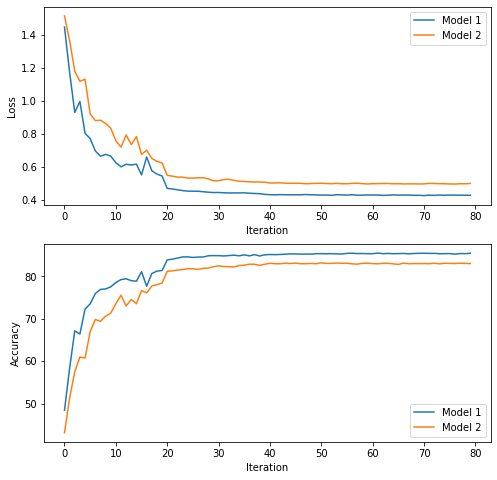

In [14]:
from components.plot_util import plot_loss_accuracy

%matplotlib inline
plot_loss_accuracy(test_module1, test_module2)